# Quantitative Analysis of Slop Articles


This is not that much data. But as these were collected programmaticaly (through `taguetura`), it is possible to expand this easily in the future.


## 0. Cleanup


In [98]:
import pandas as pd
import json
from pathlib import Path
import altair as alt
import numpy as np

alt.renderers.enable("default")  # or 'notebook' if needed

output_dir = Path("output")


def get_data():
    data = []

    for json_file in output_dir.glob("*.json"):
        with open(json_file, "r") as f:
            json_data = json.load(f)

        data.append(json_data)
    return data


df = pd.DataFrame(get_data()).set_index("_id").sort_index()

In [99]:
df.head()

,title,author,hostname,date,fingerprint,id,license,comments,raw_text,text,language,image,pagetype,filedate,source,source-hostname,excerpt,categories,tags
_id,,,,,,,,,,,,,,,,,,,
1,AI slop - Wikipedia,None,archive.org,2024-09-28,5b6d99d915edabc0,None,None,,"AI slop ""AI slop"", often simply ""slop"", is a t...","AI slop\n""AI slop"", often simply ""slop"", is a ...",None,https://web.archive.org/web/20250531205348im_/...,website,2025-06-10,https://web.archive.org/web/20250531205348/htt...,web.archive.org,None,,
2,"Spam, junk … slop? The latest wave of AI behin...",Alex Hern; Dan Milmo,theguardian.com,2024-05-19,2982139029800f2a,None,None,,Your email inbox is full of spam. Your letterb...,Your email inbox is full of spam. Your letterb...,None,https://i.guim.co.uk/img/media/2e511c73de5612d...,article,2025-06-10,https://www.theguardian.com/technology/article...,The Guardian,Tech experts hope new term for carelessly auto...,Technology,"Artificial intelligence (AI),Technology,Comput..."
3,Why doesn't Facebook just ban AI slop like Shr...,Katie Notopoulos,archive.org,2024-06-30,e0704a1596a51ff5,None,None,,"""AI slop"" images are all over Facebook. They'r...","- ""AI slop"" images are all over Facebook. They...",None,https://web.archive.org/web/20250529130553im_/...,article,2025-06-10,https://web.archive.org/web/20250529130553/htt...,Business Insider,Engagement-bait AI images like Shrimp Jesus ar...,,
4,Why the internet is filling up with nonsense ‘...,Matthew Field,archive.org,2025-01-01,41849bb88afd8ed7,None,None,,"Elon Musk riding a UFO, “Shrimp Jesus” and tin...","Elon Musk riding a UFO, “Shrimp Jesus” and tin...",None,https://web.archive.org/web/20250521212808im_/...,article,2025-06-10,https://web.archive.org/web/20250521212808/htt...,The Telegraph,Low-quality fake images are cluttering social ...,,"Technology,Facebook,Business,Standard,Instagra..."
5,Drowning in Slop,Max Read,archive.org,2024-09-25,3380931828c79fa3,None,None,,"This article was featured in One Great Story, ...","This article was featured in One Great Story, ...",None,https://web.archive.org/web/20250608033415im_/...,Article,2025-06-10,https://web.archive.org/web/20250608033415/htt...,Intelligencer,A thriving underground economy is clogging the...,,"artificial intelligence, technology, internet,..."


In [100]:
df = df[["title", "excerpt", "author", "source-hostname", "date", "text", "source"]]
df.head()

,title,excerpt,author,source-hostname,date,text,source
_id,,,,,,,
1,AI slop - Wikipedia,None,None,web.archive.org,2024-09-28,"AI slop\n""AI slop"", often simply ""slop"", is a ...",https://web.archive.org/web/20250531205348/htt...
2,"Spam, junk … slop? The latest wave of AI behin...",Tech experts hope new term for carelessly auto...,Alex Hern; Dan Milmo,The Guardian,2024-05-19,Your email inbox is full of spam. Your letterb...,https://www.theguardian.com/technology/article...
3,Why doesn't Facebook just ban AI slop like Shr...,Engagement-bait AI images like Shrimp Jesus ar...,Katie Notopoulos,Business Insider,2024-06-30,"- ""AI slop"" images are all over Facebook. They...",https://web.archive.org/web/20250529130553/htt...
4,Why the internet is filling up with nonsense ‘...,Low-quality fake images are cluttering social ...,Matthew Field,The Telegraph,2025-01-01,"Elon Musk riding a UFO, “Shrimp Jesus” and tin...",https://web.archive.org/web/20250521212808/htt...
5,Drowning in Slop,A thriving underground economy is clogging the...,Max Read,Intelligencer,2024-09-25,"This article was featured in One Great Story, ...",https://web.archive.org/web/20250608033415/htt...


## 1. Word Count


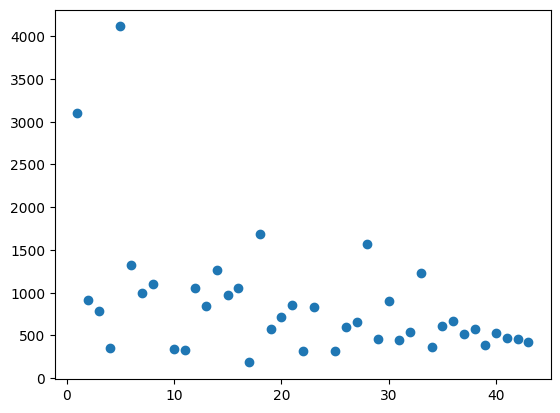

In [101]:
import matplotlib.pyplot as plt

df["word_count"] = df["text"].apply(lambda x: len(x.split()))
plt.scatter(df.index, df["word_count"])

In [102]:
df_ordered = df.sort_values("word_count", ascending=False)
df_ordered[["title", "word_count"]].head()

,title,word_count
_id,,
5,Drowning in Slop,4114
1,AI slop - Wikipedia,3105
18,I’m Running Out of Ways to Explain How Bad Thi...,1691
28,“Willy’s Chocolate Experience” Nightmare: What...,1571
6,Opinion | How Long Will A.I.’s ‘Slop’ Era Last?,1321


In [103]:
df["word_count"].describe()

count      41.000000
mean      864.365854
std       731.486663
min       184.000000
25%       455.000000
50%       652.000000
75%       995.000000
max      4114.000000
Name: word_count, dtype: float64

## 2. Dates


<Axes: >

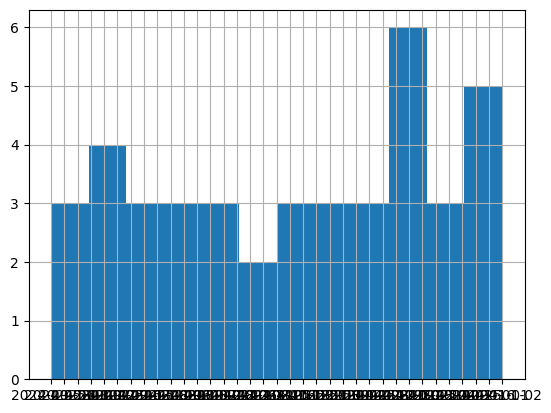

In [ ]:
date_ordered = df.sort_values("date")
df["date"].hist(bins=12)

## 3. Sentiment Analysis


### 3.1 TextBlob


In [26]:
from textblob import TextBlob

df["sentiments"] = df["text"].apply(lambda x: TextBlob(x).sentiment)
df["polarity"] = df["sentiments"].apply(lambda x: x.polarity)
df["subjectivity"] = df["sentiments"].apply(lambda x: x.subjectivity)

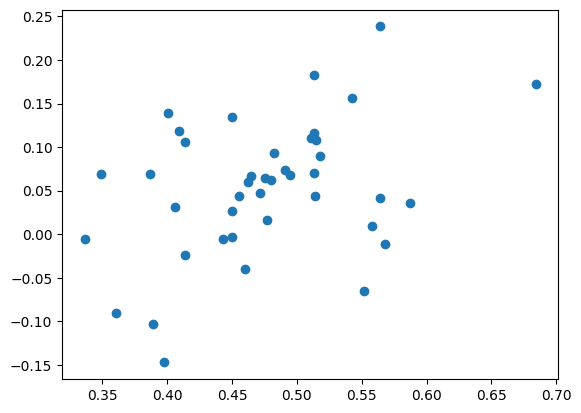

In [27]:
plt.scatter(df["subjectivity"], df["polarity"])

In [28]:
sent_plot_df = df.reset_index()  # adds original index as a column

# Scatter plot with alpha and tooltip
scatter = (
    alt.Chart(sent_plot_df)
    .mark_circle(size=60, opacity=0.8)
    .encode(
        x=alt.X("subjectivity:Q", scale=alt.Scale(domain=[0, 1]), title="Subjectivity"),
        y=alt.Y("polarity:Q", scale=alt.Scale(domain=[-1, 1]), title="Polarity"),
        tooltip=["index:O", "title:N", "subjectivity:Q", "polarity:Q"],
    )
    .properties(width=500, height=400, title="Polarity vs. Subjectivity")
)

# Reference lines
vline = (
    alt.Chart(pd.DataFrame({"x": [0.5]}))
    .mark_rule(color="gray", strokeDash=[5, 5])
    .encode(x="x:Q")
)
hline = (
    alt.Chart(pd.DataFrame({"y": [0]}))
    .mark_rule(color="gray", strokeDash=[5, 5])
    .encode(y="y:Q")
)

# Combine
chart = (scatter + vline + hline).interactive()

chart

## TODO
# add mean value
# add comparative texts

alt.LayerChart(...)

Not reflective because some pieces are quite negative ("X!!!" and "drowning in slop"). This does not reflect what I was expecting.


In [29]:
sample_text = df.iloc[1]["text"]
sample_text

'Your email inbox is full of spam. Your letterbox is full of junk mail. Now, your web browser has its own affliction: slop.\n“Slop” is what you get when you shove artificial intelligence-generated material up on the web for anyone to view.\nUnlike a chatbot, the slop isn’t interactive, and is rarely intended to actually answer readers’ questions or serve their needs.\nInstead, it functions mostly to create the appearance of human-made content, benefit from advertising revenue and steer search engine attention towards other sites.\nJust like spam, almost no one wants to view slop, but the economics of the internet lead to its creation anyway. AI models make it trivial to automatically generate vast quantities of text or images, providing an answer to any imaginable search query, uploading endless shareable landscapes and inspirational stories, and creating an army of supportive comments. If just a handful of users land on the site, reshare the meme or click through the adverts hosted, t

In [30]:
from flair.nn import Classifier
from flair.data import Sentence

tagger = Classifier.load("sentiment")

/home/noah-art3mis/lis/thematic-analysis/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This is a bit of a hack since these numbers don't mean exactly what they seem (this is a classifier model outputting a probability, not a strength; but it is representative of the ambivalence of a the capacity to interpret a sentence), but this is a rough estimate.


In [31]:
def net_sentiment_rescaled(text: str, tagger: Classifier) -> float:
    ### result is a [-1, 1] classification of intensity

    sentences = [str(x) for x in TextBlob(text).sentences]

    pos_sum = 0.0
    neg_sum = 0.0
    scores = []

    for sentence in sentences:
        _sent = Sentence(sentence)
        tagger.predict(_sent)

        label = _sent.labels[0].value
        score = _sent.labels[0].score

        if label == "POSITIVE":
            pos_sum += score
            scores.append(score)
        else:
            neg_sum += score
            scores.append(-score)

    total = pos_sum + neg_sum
    if total == 0:
        net_score = 0.0
    else:
        net_score = (pos_sum - neg_sum) / total

    scores_array = np.array(scores)
    sd = scores_array.std() if len(scores) > 1 else 0.0

    print(f"Net sentiment (-1 to 1): {net_score:.3f} ± {sd:.3f} SD")
    return net_score

In [32]:
def average_sentiment(text: str, tagger: Classifier) -> float:
    """
    Compute average sentiment of sentences in text.
    Result is average signed score in [-1, 1].
    """

    sentences = [str(x) for x in TextBlob(text).sentences]
    scores = []

    for sentence in sentences:
        _sent = Sentence(sentence)
        tagger.predict(_sent)

        label = _sent.labels[0].value
        score = _sent.labels[0].score

        signed_score = score if label == "POSITIVE" else -score
        scores.append(signed_score)

    if not scores:
        avg_score = 0.0
        sd = 0.0
    else:
        scores_array = np.array(scores)
        avg_score = scores_array.mean()
        sd = scores_array.std()

    print(f"Average sentiment (-1 to 1): {avg_score:.3f} ± {sd:.3f} SD")
    return avg_score

While both results are similar, the first one is more relevant as the distribution of the scores is essentially bimodal. In any case, the SD is high, although since the value is scaled to -1 to 1, this means it is still far from the other side.


We apply these to all documents.


In [33]:
df["nn_net_sentiment"] = df["text"].apply(lambda x: net_sentiment_rescaled(x, tagger))
df["nn_avg_sentiment"] = df["text"].apply(lambda x: average_sentiment(x, tagger))

KeyboardInterrupt: 

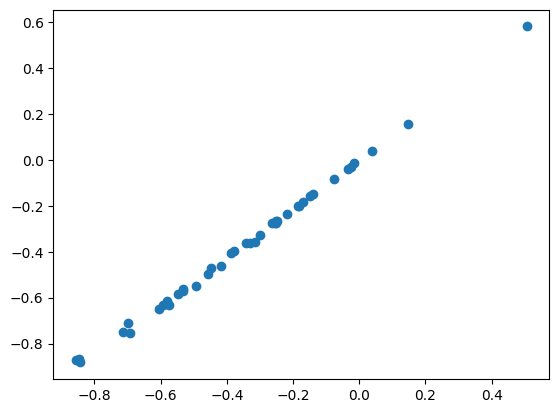

In [ ]:
plt.scatter(df["nn_avg_sentiment"], df["nn_net_sentiment"])

In [ ]:
df.drop(columns=["nn_avg_sentiment"], inplace=True)

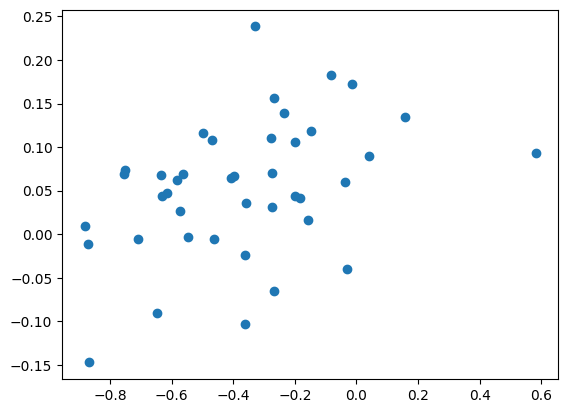

In [ ]:
plt.scatter(df["nn_net_sentiment"], df["polarity"])

Seems like they are mostly the same so I'm dropping the average. While I could considere the SD this is good enough.


Some correlation. The polarity is more intense. Comes from a better model, thought it seems to be tuned differently with most of the values being high while the other gave us low values.


In [ ]:
# df.to_feather("analysis.feather")

In [ ]:
df["nn_net_sentiment"].describe()

count    41.000000
mean     -0.369605
std       0.303193
min      -0.882635
25%      -0.582879
50%      -0.360342
75%      -0.199528
max       0.581478
Name: nn_net_sentiment, dtype: float64

In [ ]:
df["polarity"].describe()

count    41.000000
mean      0.053007
std       0.078265
min      -0.147205
25%       0.008965
50%       0.062235
75%       0.105323
max       0.238481
Name: polarity, dtype: float64

In [ ]:
df["subjectivity"].describe()

count    41.000000
mean      0.475259
std       0.071576
min       0.336278
25%       0.413556
50%       0.475366
75%       0.513961
max       0.684093
Name: subjectivity, dtype: float64

## Topic Modeling


### Gensim


In [ ]:
df = pd.read_feather("analysis.feather")

In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from gensim import corpora, models


nltk.download("stopwords")
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
stop_words = set(stopwords.words("english"))


def preprocess(texts):
    """
    Preprocessing function: tokenization + lemmatization + lowercase + stopwords + punctuation + numbers
    """
    processed_texts = []
    for doc in texts:
        spacy_doc = nlp(doc)
        tokens = [
            token.lemma_.lower()
            for token in spacy_doc
            if token.is_alpha and token.lemma_.lower() not in stop_words
        ]
        processed_texts.append(tokens)
    return processed_texts


documents = df["text"].tolist()
texts = preprocess(documents)

[nltk_data] Downloading package stopwords to /home/noah-
[nltk_data]     art3mis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=2, no_above=0.5)
bow_corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [56]:
TOPICS = 5

lda_model = models.LdaModel(
    corpus=bow_corpus,
    id2word=dictionary,
    num_topics=TOPICS,
    random_state=42,
    passes=10,
    alpha="auto",
)

for idx, topic in lda_model.show_topics(num_topics=-1, formatted=False):
    terms = ", ".join([f"{word} ({weight:.2f})" for word, weight in topic])
    print(f"Topic {idx}: {terms}")

Topic 0: ai (0.01), book (0.01), halloween (0.01), parade (0.01), year (0.00), people (0.00), one (0.00), turn (0.00), catalog (0.00), customer (0.00)
Topic 1: ai (0.03), generate (0.01), use (0.01), slop (0.01), image (0.01), content (0.01), game (0.01), make (0.01), say (0.01), one (0.00)
Topic 2: make (0.01), facebook (0.01), ai (0.01), slop (0.00), image (0.00), post (0.00), use (0.00), even (0.00), much (0.00), like (0.00)
Topic 3: say (0.01), event (0.01), ai (0.01), slop (0.01), people (0.01), parade (0.01), website (0.01), content (0.01), go (0.01), halloween (0.01)
Topic 4: trump (0.01), slop (0.01), ai (0.01), cola (0.01), coca (0.01), company (0.01), ad (0.01), real (0.00), like (0.00), create (0.00)


In [57]:
TOPICS = 5

lda_model = models.LdaModel(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=TOPICS,
    random_state=42,
    passes=10,
    alpha="auto",
)

for idx, topic in lda_model.show_topics(num_topics=-1, formatted=False):
    terms = ", ".join([f"{word} ({weight:.2f})" for word, weight in topic])
    print(f"Topic {idx}: {terms}")

Topic 0: enix (0.00), cola (0.00), coca (0.00), square (0.00), foamstars (0.00), voice (0.00), actor (0.00), okatani (0.00), album (0.00), vercel (0.00)
Topic 1: parade (0.00), game (0.00), halloween (0.00), activision (0.00), slop (0.00), dublin (0.00), event (0.00), facebook (0.00), image (0.00), website (0.00)
Topic 2: coca (0.00), cola (0.00), meta (0.00), advert (0.00), baby (0.00), maga (0.00), harris (0.00), bandicoot (0.00), click (0.00), facebook (0.00)
Topic 3: claude (0.00), tweet (0.00), unwanted (0.00), term (0.00), ethic (0.00), llm (0.00), spam (0.00), aleksic (0.00), may (0.00), language (0.00)
Topic 4: trump (0.00), cola (0.00), brand (0.00), coca (0.00), spotify (0.00), centric (0.00), italian (0.00), brainrot (0.00), mcdonald (0.00), hurricane (0.00)
